In [6]:
#importing the pandas library 
import pandas as pd

# DATA WRANGLING  



In [7]:
user_data=pd.read_csv("/kaggle/input/netflix-data/Netflix Userbase.csv")

In [8]:
user_data.shape

(2500, 10)

In [9]:
user_data.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [10]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [11]:
user_data.describe()

,User ID,Monthly Revenue,Age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


# Enhancing Data and Columns

In [12]:
user_data.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [13]:
user_data.rename(columns={'User ID': 'user_id', 'Subscription Type': 'subscription_type', 'Monthly Revenue': 
                           'monthly_revenue', 'Join Date': 'join_date', 'Last Payment Date': 'last_payment_date',
                           'Country': 'country', 'Age': 'age', 'Gender': 'gender', 'Device': 'device', 
                           'Plan Duration': 'plan_duration'}, inplace=True)

In [14]:
print("Post-processing Columns:")
user_data.columns

Post-processing Columns:


Index(['user_id', 'subscription_type', 'monthly_revenue', 'join_date',
       'last_payment_date', 'country', 'age', 'gender', 'device',
       'plan_duration'],
      dtype='object')

# ANALYSING MISSING DATA

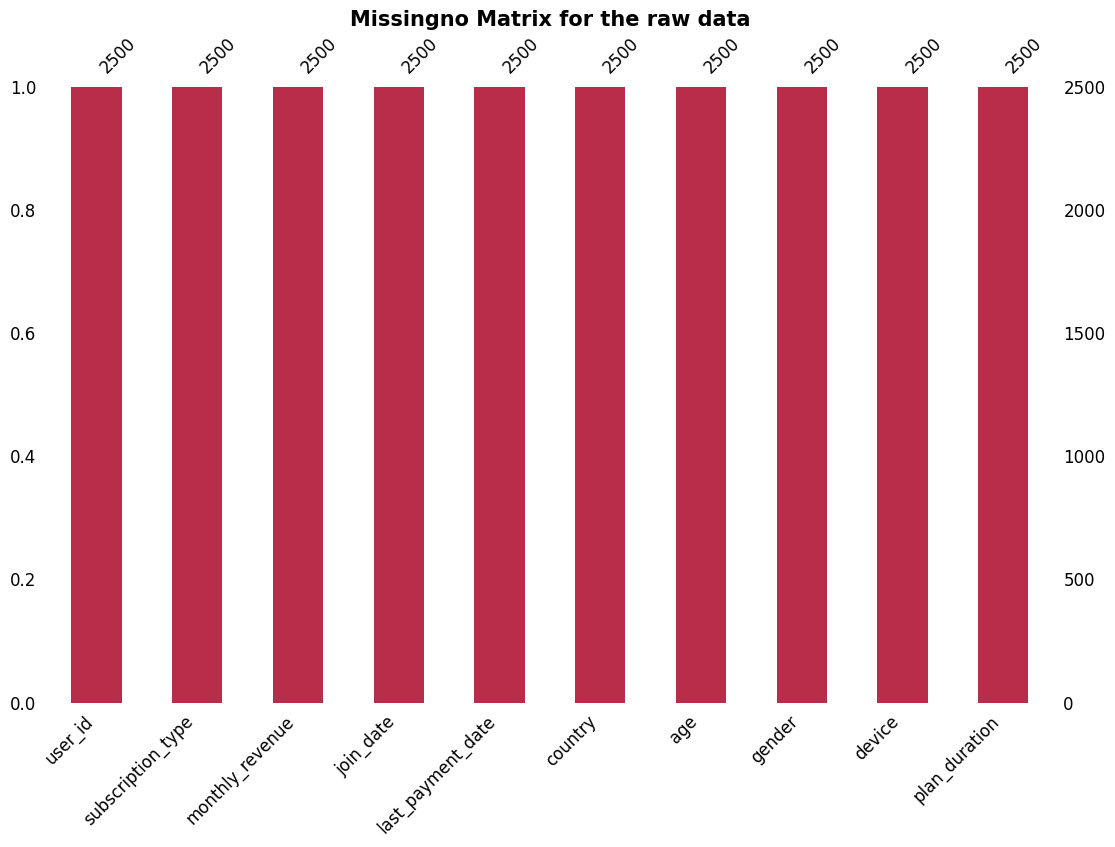

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
msn.bar(user_data, color=(0.72, 0.18, 0.29), figsize=[13, 8], fontsize=12)
plt.title("Missingno Matrix for the raw data", fontsize=15, fontweight='bold')
plt.show()

In [16]:
user_data.isnull().sum()

user_id              0
subscription_type    0
monthly_revenue      0
join_date            0
last_payment_date    0
country              0
age                  0
gender               0
device               0
plan_duration        0
dtype: int64

In [17]:
user_data.shape

(2500, 10)

# DATA CLEANING PROCESS


In [18]:
user_data.dropna(axis='columns')

,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [19]:
duplicated_cells = 0
check_duplicate = user_data.duplicated()

In [20]:
for row in check_duplicate:
    if row:
        dublicated_cell+=1
duplicated_prc = (duplicated_cells / len(check_duplicate)) * 100
print("• Total Cells:", len(check_duplicate), '\n'
     "• Duplicated Cells:", duplicated_cells,'\n'
     "• Duplicate %:", duplicated_prc)

• Total Cells: 2500 
• Duplicated Cells: 0 
• Duplicate %: 0.0


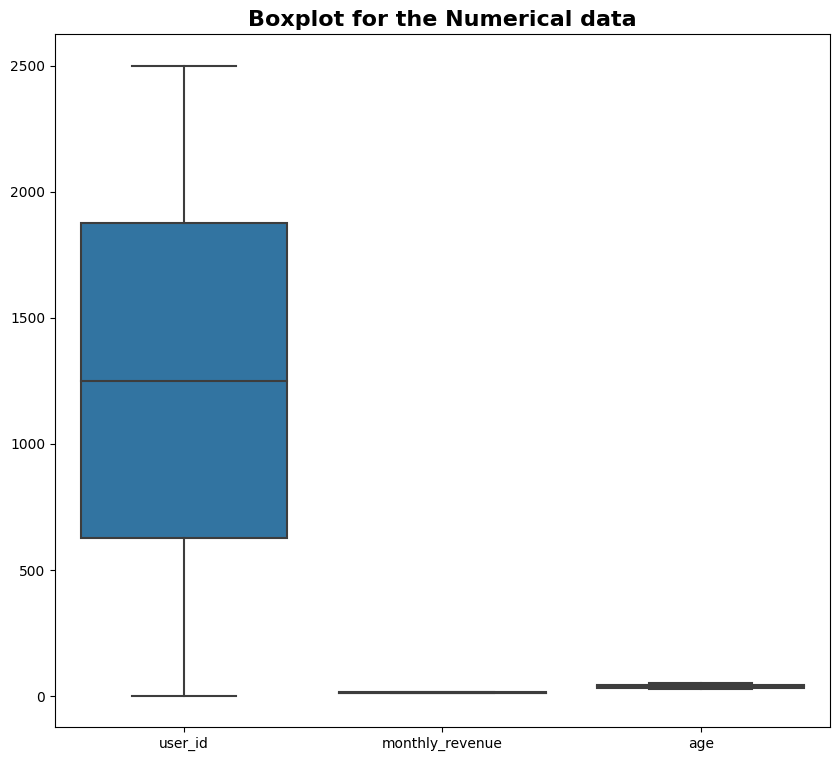

In [21]:
plt.figure(figsize=(10, 9))
sns.boxplot(user_data)
plt.title("Boxplot for the Numerical data", fontsize=16, fontweight='bold')
plt.show()

In [22]:
user_data['join_date'] = pd.to_datetime(user_data['join_date'])
user_data['last_payment_date'] = pd.to_datetime(user_data['last_payment_date'])
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2500 non-null   int64         
 1   subscription_type  2500 non-null   object        
 2   monthly_revenue    2500 non-null   int64         
 3   join_date          2500 non-null   datetime64[ns]
 4   last_payment_date  2500 non-null   datetime64[ns]
 5   country            2500 non-null   object        
 6   age                2500 non-null   int64         
 7   gender             2500 non-null   object        
 8   device             2500 non-null   object        
 9   plan_duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


/tmp/ipykernel_24/4103293169.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_data['join_date'] = pd.to_datetime(user_data['join_date'])
/tmp/ipykernel_24/4103293169.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_data['last_payment_date'] = pd.to_datetime(user_data['last_payment_date'])


In [27]:
user_data['subscribed_duration'] = user_data['last_payment_date'] - user_data['join_date']
user_data['subscribed_duration'] = user_data['subscribed_duration'].dt.days
user_data['subscribed_duration'].head(25)

0     629
1     774
2     119
3     262
4     174
5     466
6     651
7     140
8     246
9      -9
10    402
11     97
12    574
13    534
14    -69
15    358
16    517
17    614
18    128
19     26
20   -106
21    341
22    776
23    479
24    106
Name: subscribed_duration, dtype: int64

In [28]:
user_data['start_month'] = user_data['join_date'].dt.month
user_data['start_month'].head(25)

0      1
1      5
2      2
3     10
4      1
5      3
6      9
7      2
8     10
9      7
10     5
11     3
12    11
13     1
14     9
15     7
16     1
17    10
18     2
19     5
20    10
21     7
22     5
23     3
24     3
Name: start_month, dtype: int32

In [29]:
# Customer Lifetime Value (clv)
user_data['clv'] = user_data["subscribed_duration"] * user_data['monthly_revenue']
user_data['clv'].head(25)

0      6290
1     11610
2      1428
3      3144
4      1740
5      6990
6      7812
7      1400
8      2952
9      -135
10     4020
11     1455
12     6888
13     5340
14     -828
15     5370
16     5170
17     7368
18     1920
19      260
20    -1590
21     3410
22     9312
23     5748
24     1060
Name: clv, dtype: int64

In [34]:
user_data = user_data.drop(['last_payment_date', 'join_date'], axis=1)
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              2500 non-null   int64 
 1   subscription_type    2500 non-null   object
 2   monthly_revenue      2500 non-null   int64 
 3   country              2500 non-null   object
 4   age                  2500 non-null   int64 
 5   gender               2500 non-null   object
 6   device               2500 non-null   object
 7   plan_duration        2500 non-null   object
 8   start_month          2500 non-null   int32 
 9   subscribed_duration  2500 non-null   int64 
 10  clv                  2500 non-null   int64 
dtypes: int32(1), int64(5), object(5)
memory usage: 205.2+ KB


In [44]:
#Save processed data for future Model Integration
try:
    user_data.to_csv('/kaggle/working/netflix_processed.csv', sep=',', index=False)
    user_data.to_json('/kaggle//working/netflix_processed.json')

except Exception as exc:
    print("! Exception encountered", exc)

else:
    print("Dataframe successfully saved")

Dataframe successfully saved


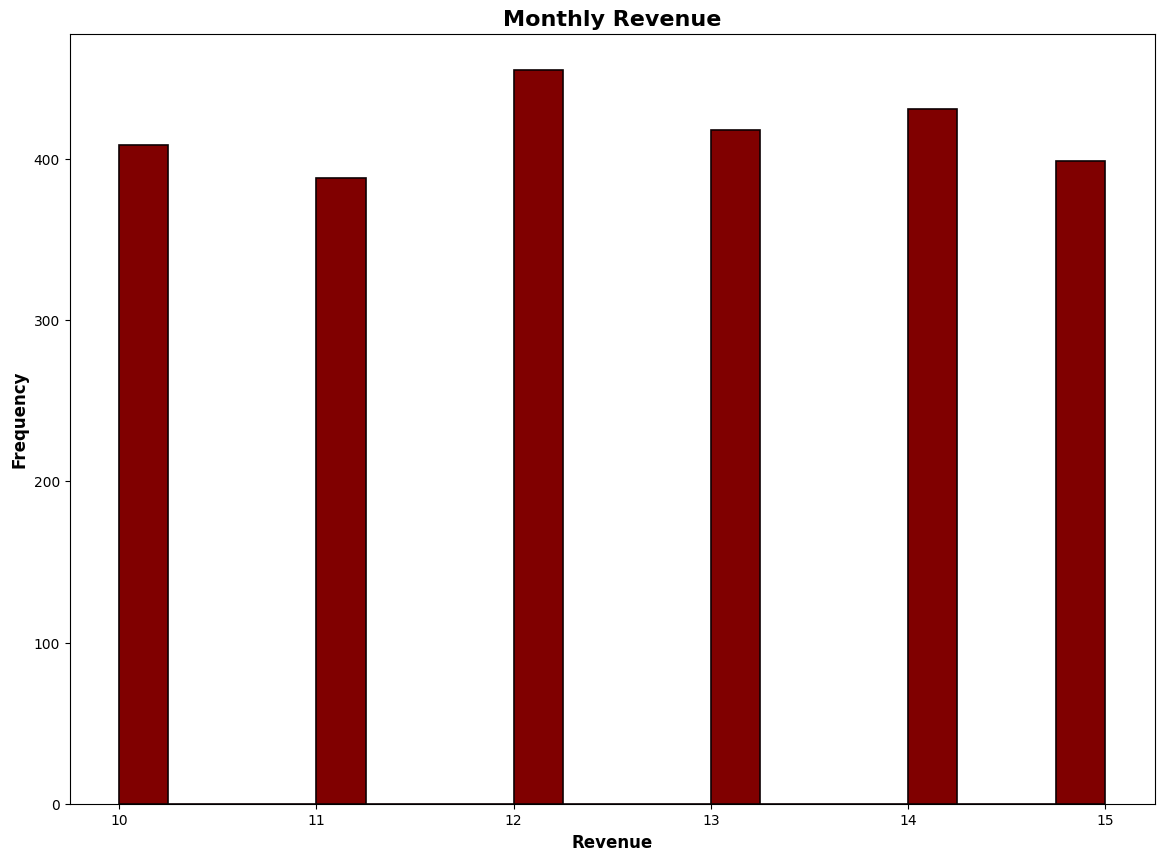

In [46]:
plt.figure(figsize=(14, 10))
plt.hist(user_data['monthly_revenue'], bins=20, color='maroon', edgecolor='#0d0103', linewidth=1.2)
plt.title("Monthly Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Revenue", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

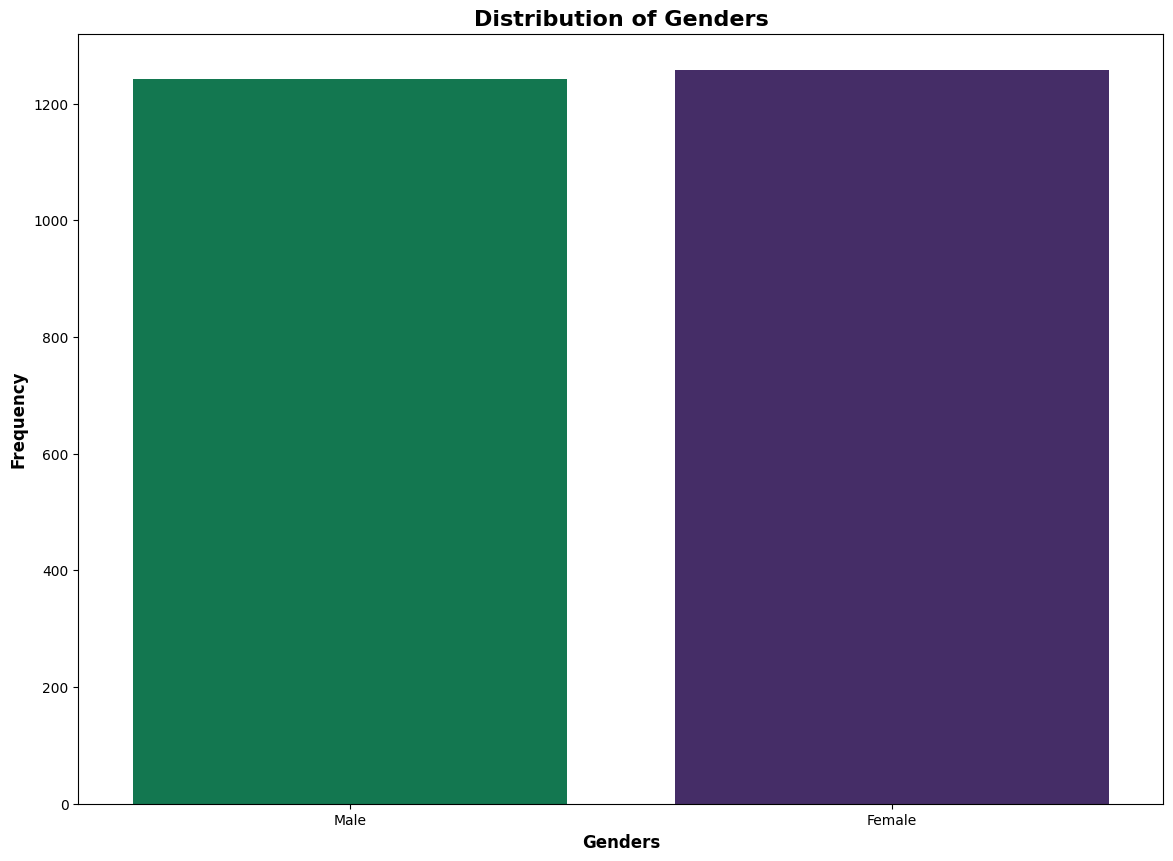

In [47]:
plt.figure(figsize=(14, 10))
title = "Distribution of Genders"
palette=['#038754','#432371']

sns.countplot(x='gender', data=user_data, palette=palette)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Genders', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()

In [48]:
user_data['age'].mean()

38.7956

In [49]:
user_data['age'].median()

39.0

In [50]:
user_data['age'].std()

7.171777631644689

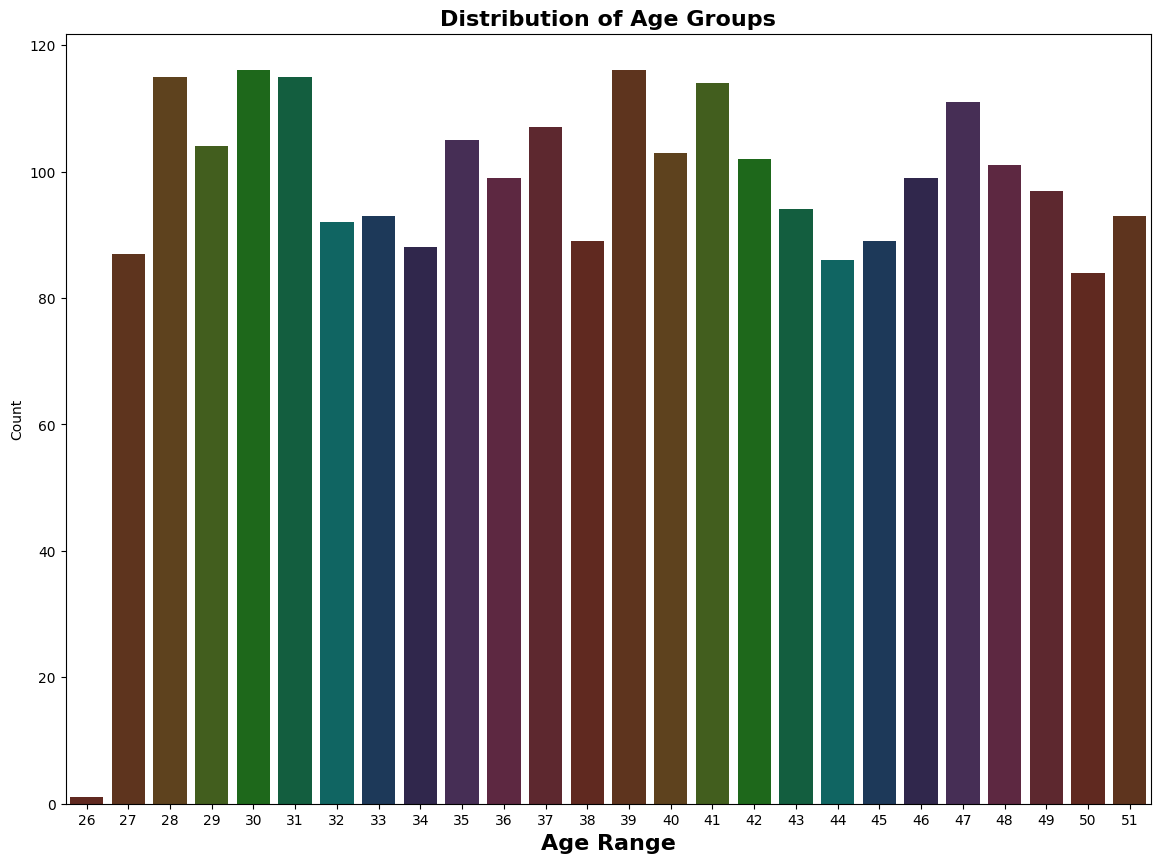

In [51]:
plt.figure(figsize=(14, 10))
title = "Distribution of Age Groups"
palette=['#6b2115','#693113', '#694313', '#436913', '#12750e', '#066b41', '#02736f', '#133863', '#2d2152', '#48275c', 
         '#661f40', '#661f29']

sns.countplot(x='age', data=user_data, palette=palette)
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Age Range', fontsize=16, fontweight='bold')
plt.ylabel('Count')
plt.show()

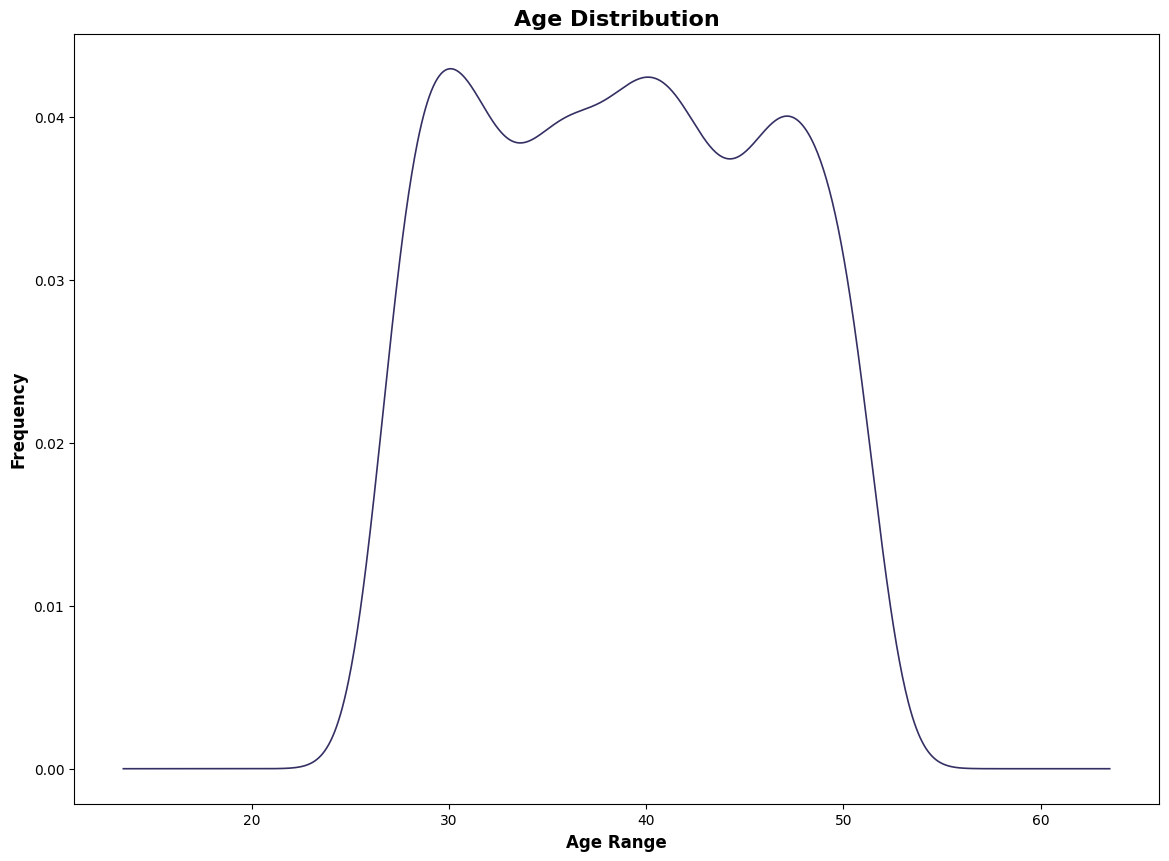

In [52]:
plt.figure(figsize=(14, 10))
user_data['age'].plot(kind='kde', color='#343063', linewidth=1.2)
plt.title("Age Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Age Range", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

In [53]:
user_data['subscription_type'].unique()

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [54]:
user_data['subscription_type'].value_counts()

subscription_type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

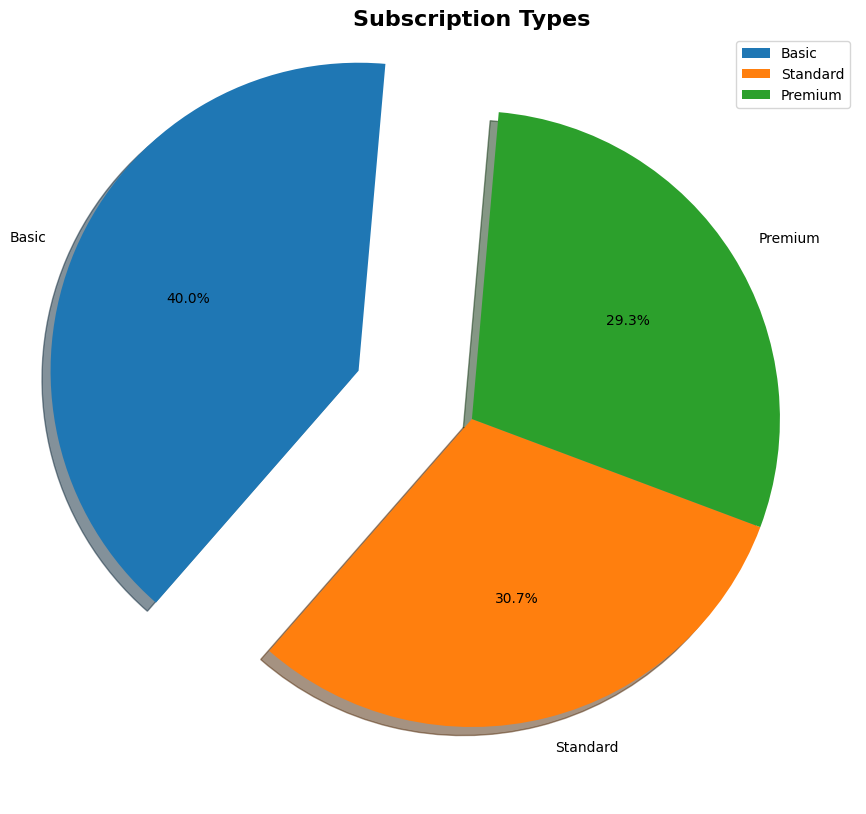

In [55]:
plt.figure(figsize=(14, 10))
explode = [0.4, 0.0, 0.0]
sub_count = user_data['subscription_type'].value_counts()
plt.pie(sub_count, labels=sub_count.index, autopct='%1.1f%%', shadow=True, explode=explode, startangle=85)
plt.title('Subscription Types', fontsize=16, fontweight='bold')
plt.legend(loc="upper right")
plt.show()

customer_churn = user_data'clv'] > 30
customer_churn.value_counts()

In [57]:
customer_churn = user_data['clv'] > 30 
customer_churn.value_counts()

clv
True     2487
False      13
Name: count, dtype: int64

In [58]:
customer_churn.get(False, 0)

0

In [59]:
user_data['start_month'].value_counts()

start_month
10    418
7     396
6     338
9     306
8     296
5     135
11    122
4     108
3     103
12     98
2      92
1      88
Name: count, dtype: int64

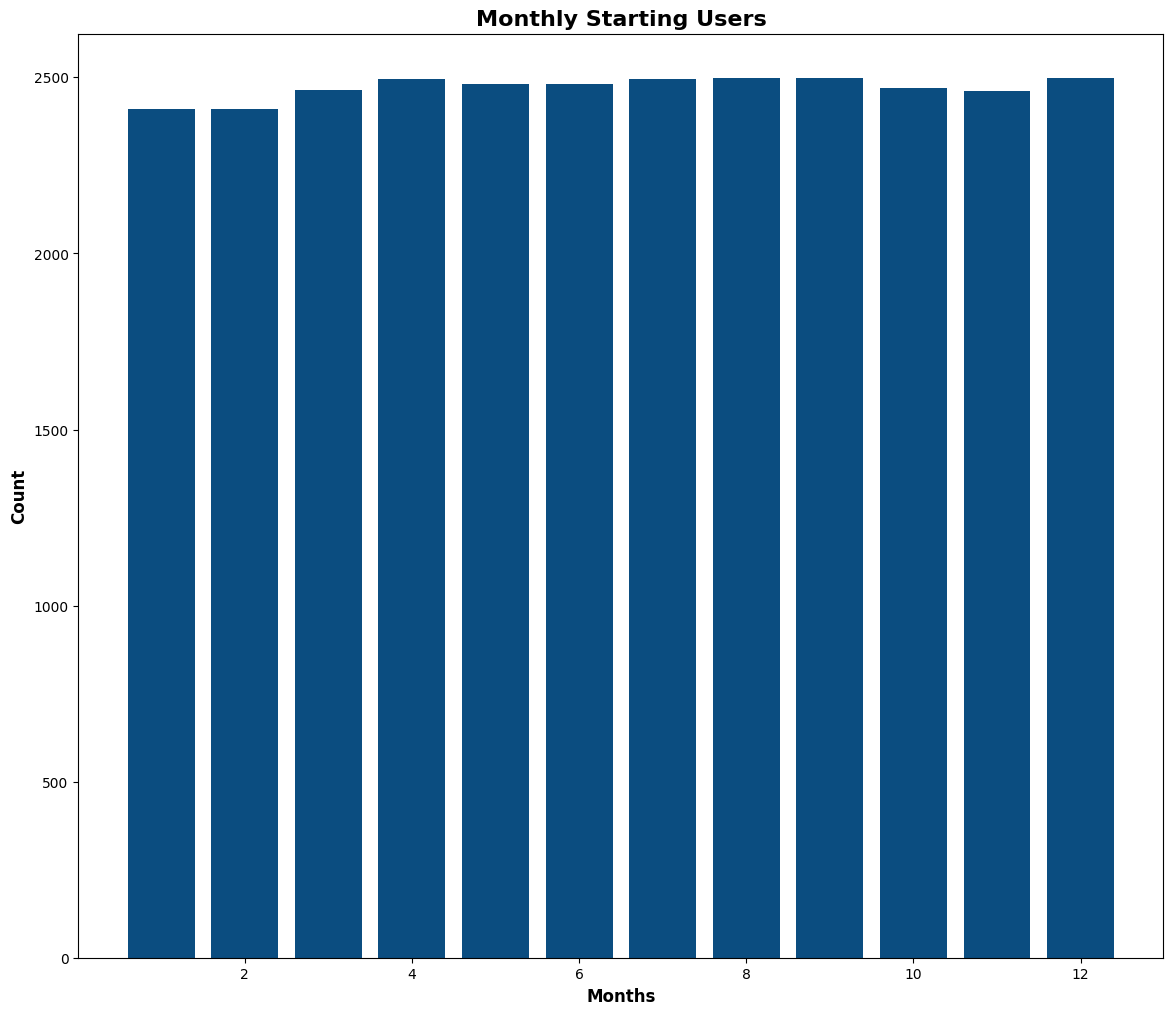

In [60]:
plt.figure(figsize=(14, 12))
plt.bar(user_data['start_month'], user_data['start_month'].index, color='#0b4d80')
plt.title('Monthly Starting Users', fontsize=16, fontweight='bold')
plt.xlabel('Months', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

In [61]:
query = user_data['country'].value_counts()
query

country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

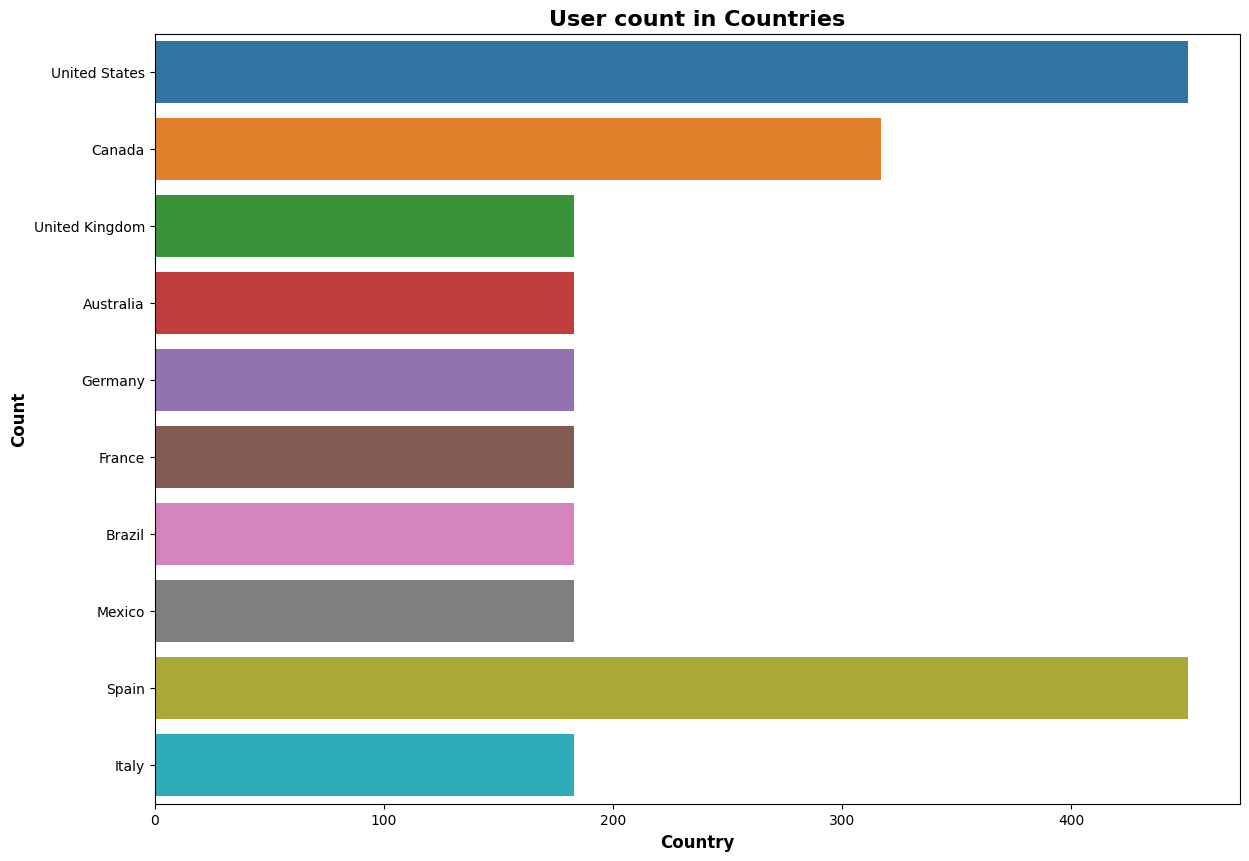

In [62]:
plt.figure(figsize=(14, 10))

sns.countplot(y=user_data['country'])
plt.title('User count in Countries', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.show()

In [63]:
query = user_data.groupby('subscription_type')['age'].mean().sort_values()
query

subscription_type
Premium     38.512960
Basic       38.828829
Standard    39.022135
Name: age, dtype: float64

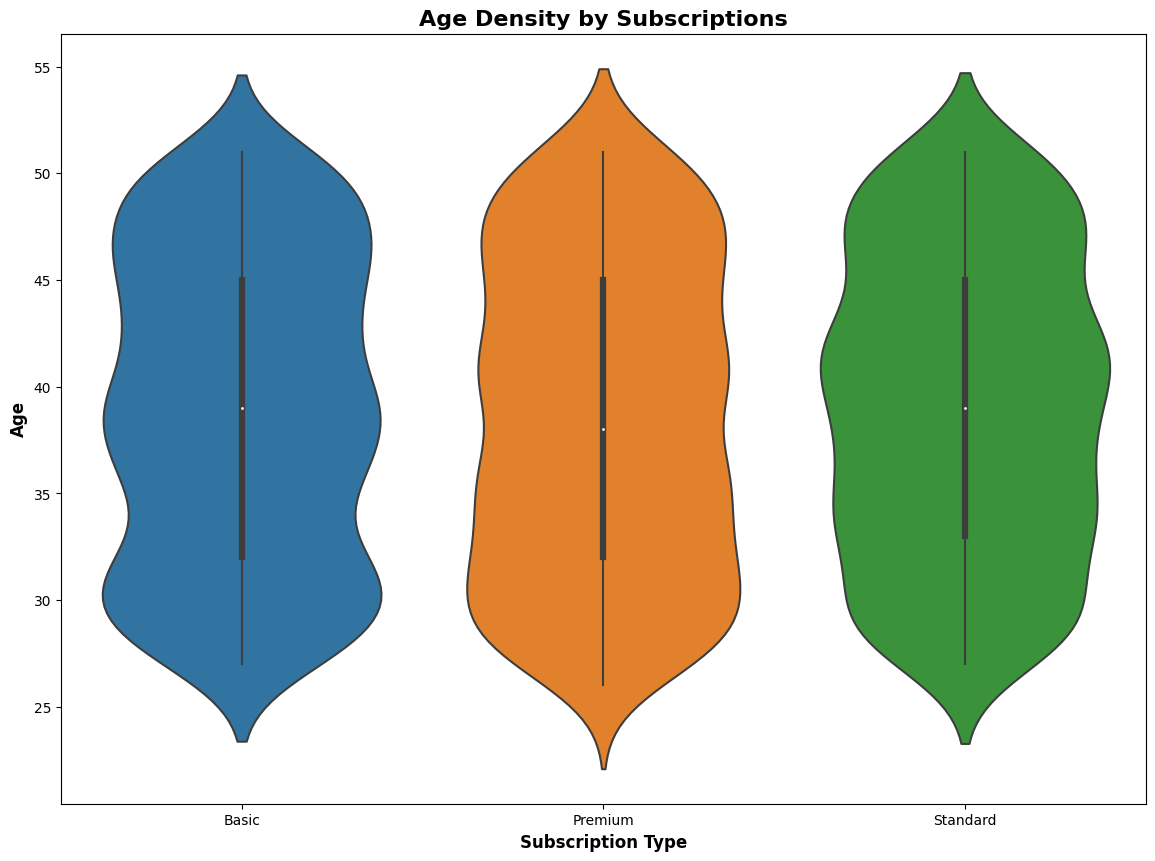

In [66]:
plt.figure(figsize=(14, 10))
sns.violinplot(x='subscription_type', y='age', data=user_data)
plt.title('Age Density by Subscriptions', fontsize=16, fontweight='bold')
plt.xlabel('Subscription Type', fontsize=12, fontweight='bold')
plt.ylabel('Age', fontsize=12, fontweight='bold')
plt.show()


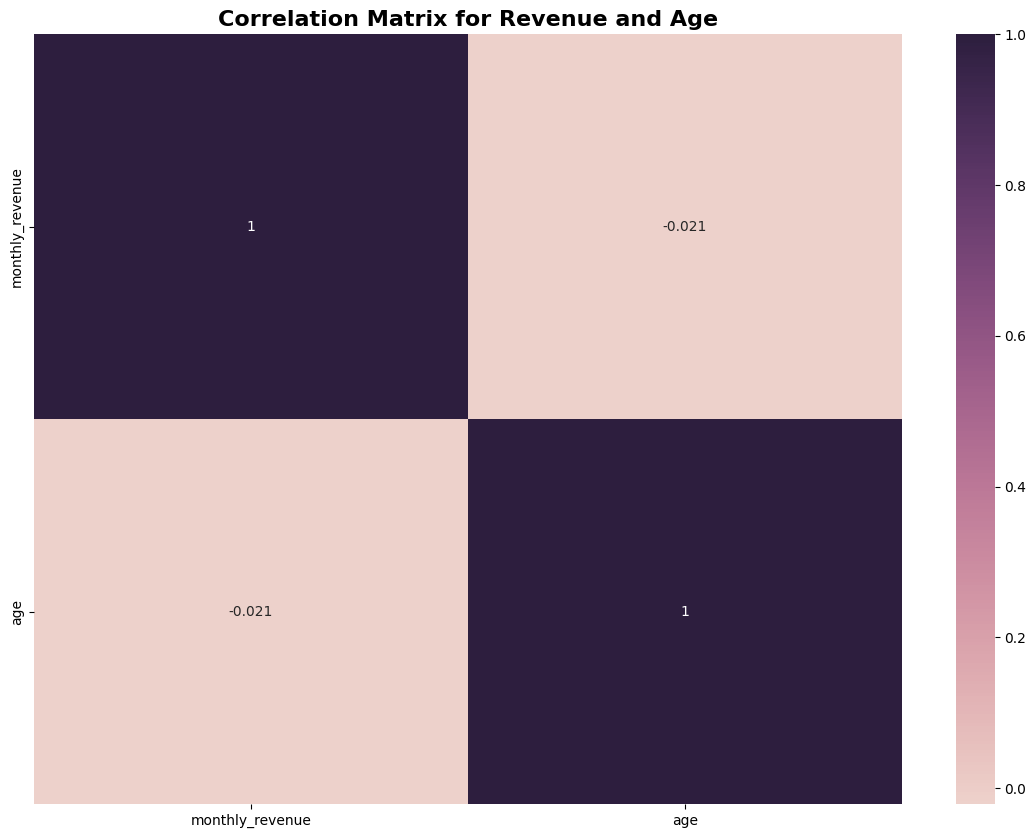

In [67]:
plt.figure(figsize=(14, 10))
title = "Correlation Matrix for Revenue and Age"
corr_matrix = user_data[['monthly_revenue', 'age']].corr()
sns.heatmap(corr_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title(title, fontsize=16, fontweight='bold')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

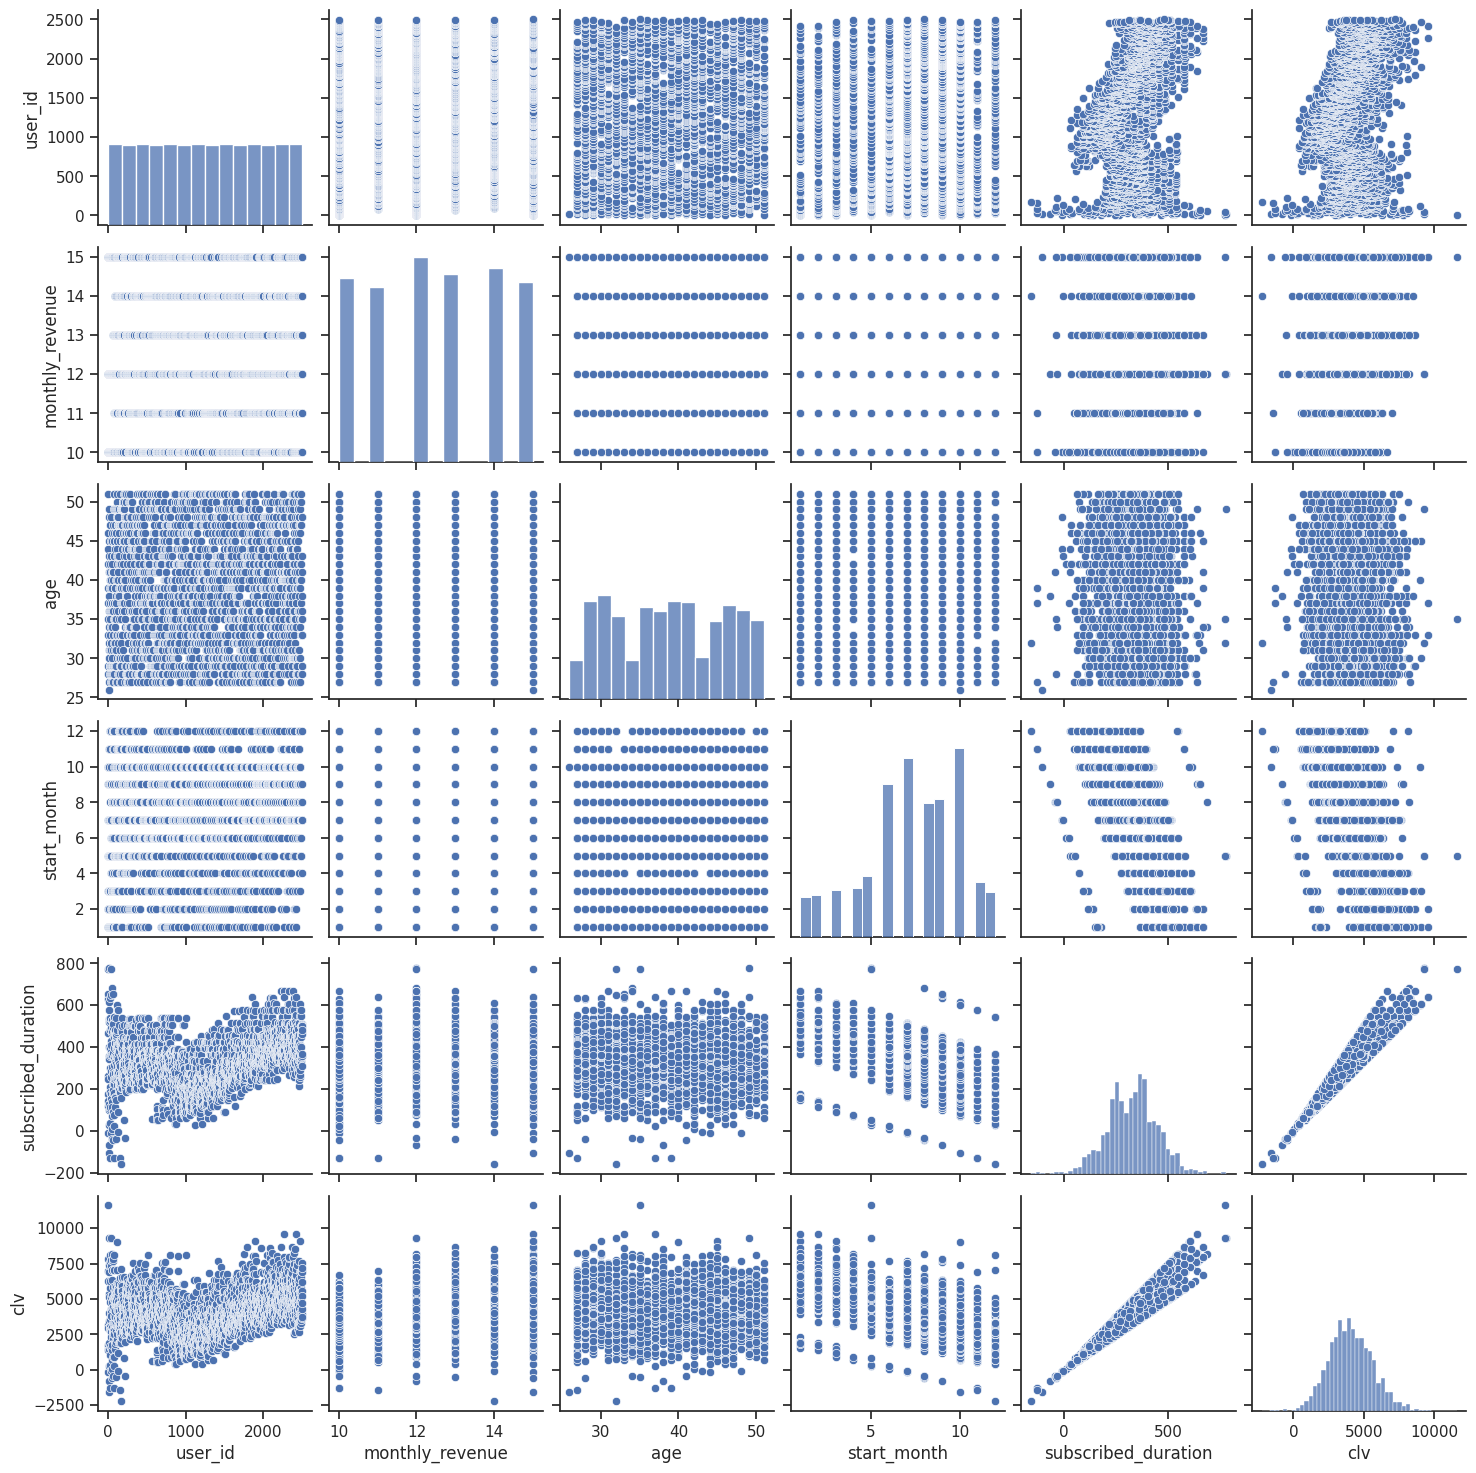

In [68]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(user_data)
plt.show()

In [70]:
query = user_data['device'].value_counts()
query

device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

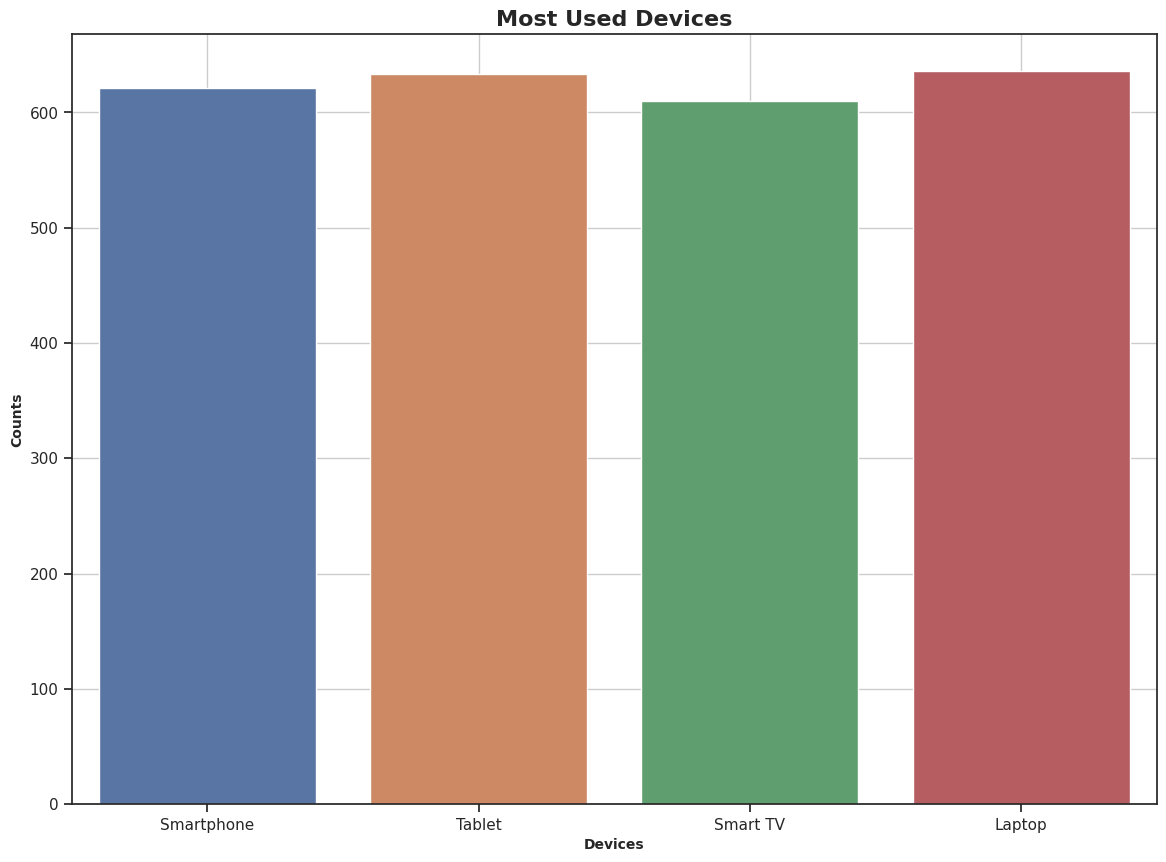

In [71]:
plt.figure(figsize=(14, 10))
sns.countplot(x=user_data['device'])
plt.title('Most Used Devices', fontsize=16, fontweight='bold')
plt.xlabel('Devices', fontsize=10, fontweight='bold')
plt.ylabel('Counts', fontsize=10, fontweight='bold')
plt.grid(True)
plt.show()

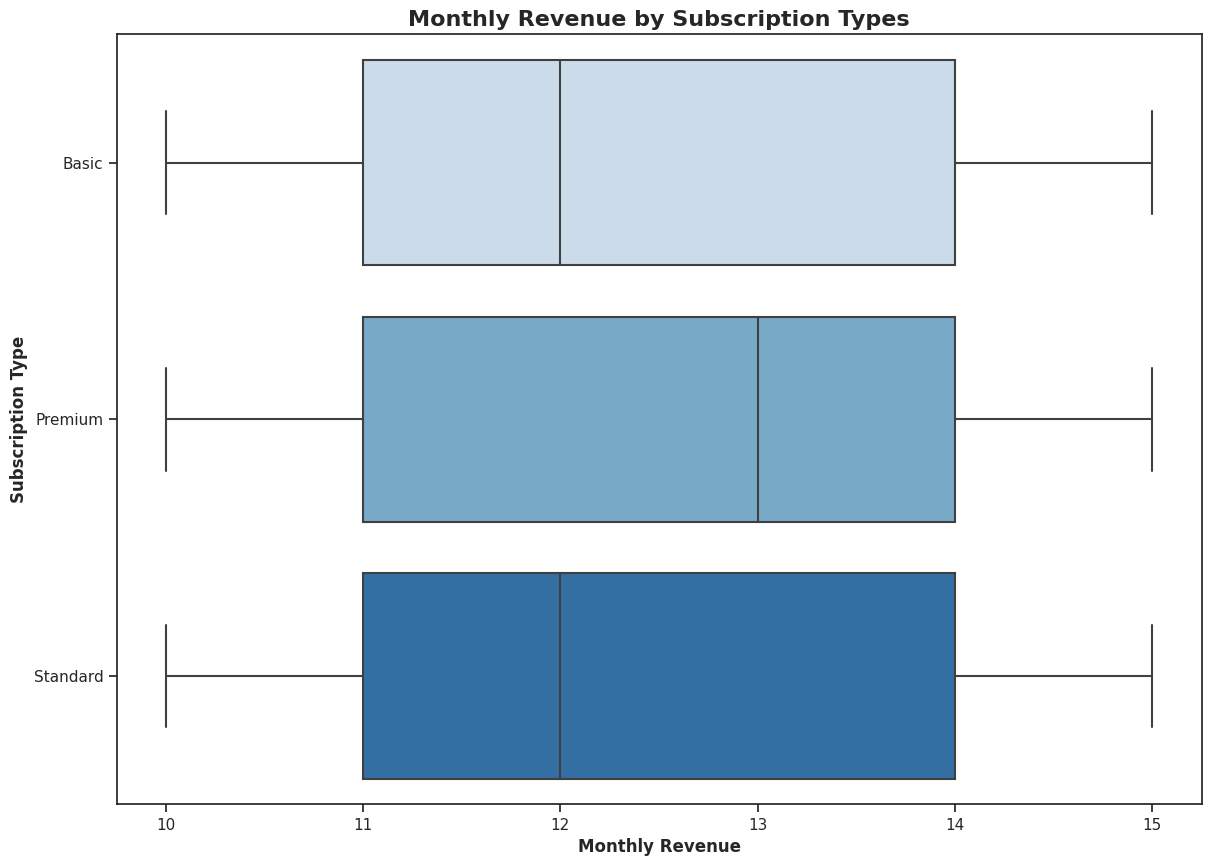

In [72]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='monthly_revenue', y='subscription_type', data=user_data, palette="Blues")
plt.title('Monthly Revenue by Subscription Types', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.ylabel('Subscription Type', fontsize=12, fontweight='bold')
plt.show()

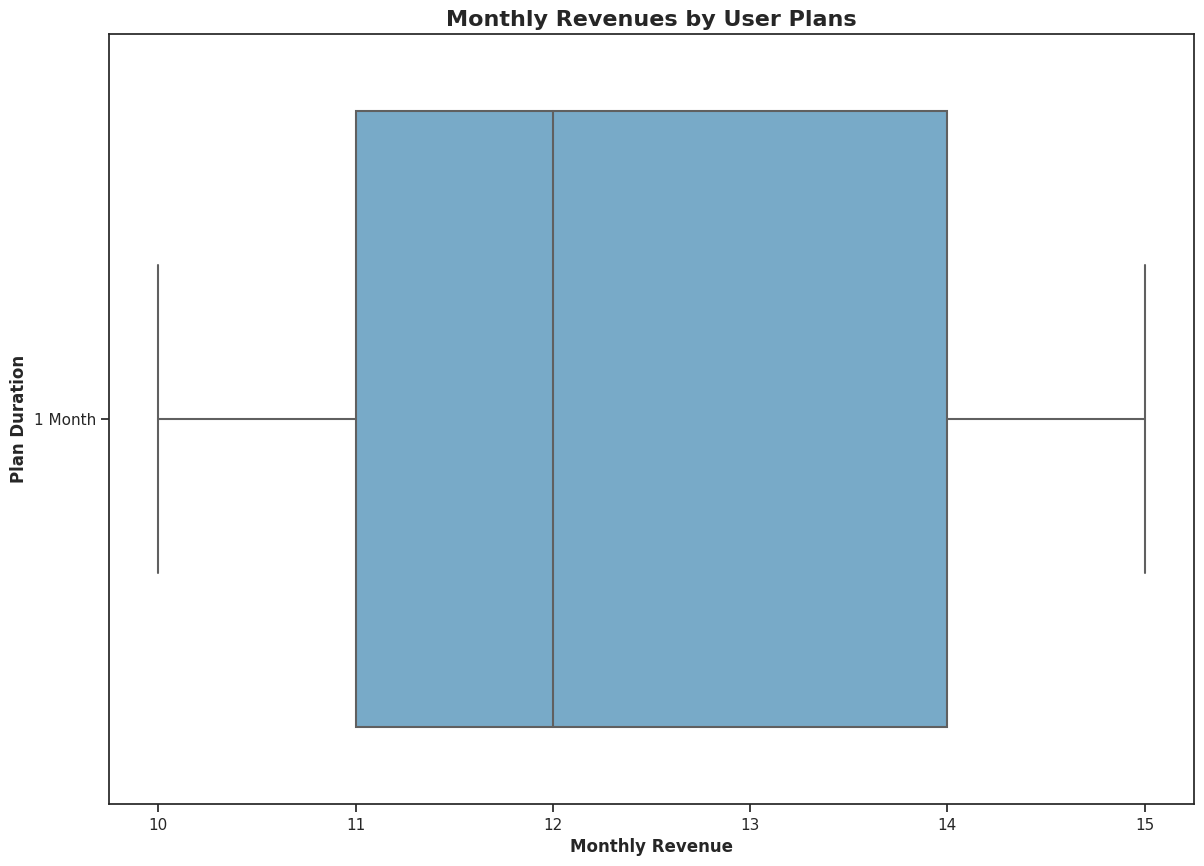

In [73]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='monthly_revenue', y='plan_duration', data=user_data, palette="Blues")
plt.title('Monthly Revenues by User Plans', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Revenue', fontsize=12, fontweight='bold')
plt.ylabel('Plan Duration', fontsize=12, fontweight='bold')
plt.show()